# Goal: Compute alpha, beta diversity, etc

####  Estimate Basic Community diversity metrics on unfiltered data

## Packages

In [21]:
library(phyloseq)
library(microbiome)
library(dplyr)
library(tidyverse)
library(reshape)

## Load

In [3]:
load('phyloseq-psor-control-metagenome.RData')

In [4]:
psq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 424 taxa and 100 samples ]
sample_data() Sample Data:       [ 100 samples by 56 sample variables ]
tax_table()   Taxonomy Table:    [ 424 taxa by 7 taxonomic ranks ]

## Alpha diversity (Shanon index)

In [12]:
shannon <- microbiome::alpha(psq, index='shannon')

#Assign the estimated diversity to sample metadata

sample_data(psq)$shannon <- shannon$diversity_shannon

# Split the values by group

spl <- split(sample_data(psq)$shannon, sample_data(psq)$Diagnosis)

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity



In [13]:
# Kolmogorov-Smirnov test
ks.test(spl$control, spl$psoriasis)


	Exact two-sample Kolmogorov-Smirnov test

data:  spl$control and spl$psoriasis
D = 0.11682, p-value = 0.8319
alternative hypothesis: two-sided


In [14]:
pv <- ks.test(spl$control, spl$psoriasis)$p.value

# Adjust the p-value
padj <- p.adjust(pv)

pv

[1] 0.8318528

In [17]:
sample_size = as.data.frame(sample_data(psq)[,c('ID','Diagnosis')]) %>% group_by(Diagnosis) %>% summarize(num=n())

# Visualize shannon diversity

### Figure 1 A

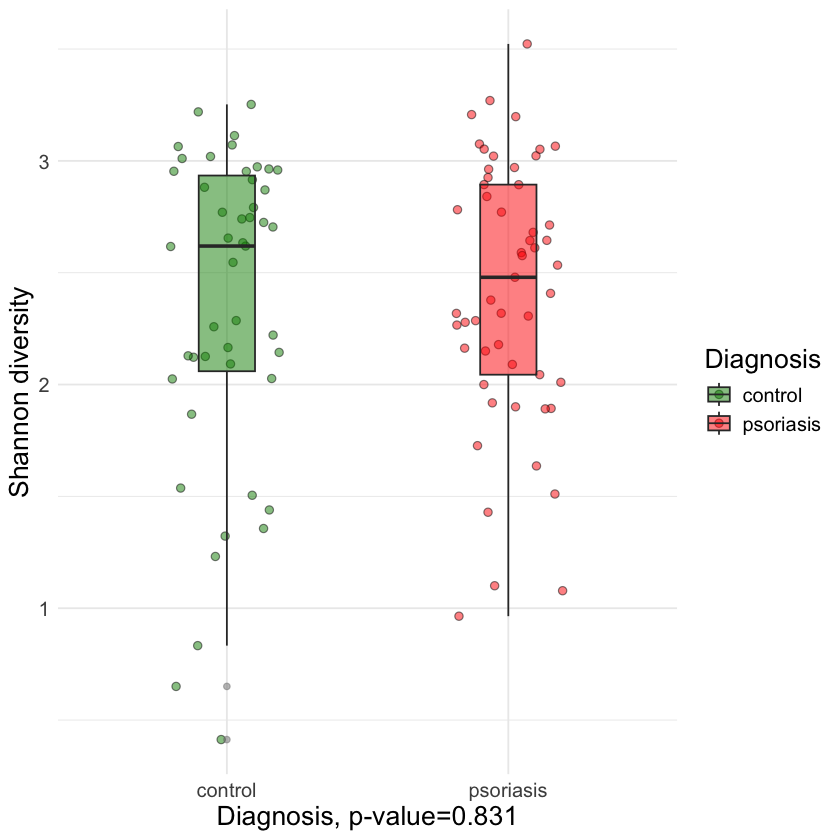

In [19]:
# Violin

p.shannon <- boxplot_alpha(psq, index = "shannon", x_var = "Diagnosis", fill.colors = c(control="green4", psoriasis="red"))

p.shannon <- p.shannon + theme_minimal() + labs(x="Diagnosis, p-value=0.831", y="Shannon diversity") + theme(axis.text = element_text(size=12), axis.title = element_text(size=16), legend.text = element_text(size=12), legend.title = element_text(size=16))

p.shannon

#dev.copy2pdf(file="Shannon_case_control_Violin_plot.pdf",width=3.5,height=3.5)


# Beta diversity

 Inter-individual divergence / spread Divergence within a sample set quantifies the overall heterogeneity in community composition across samples
 Calculate divergences within the control and psoriasis groups with respect to the median profile within each group.

In [22]:
b.cont <- divergence(subset_samples(psq, Diagnosis == "control"), apply(abundances(subset_samples(psq, Diagnosis == "control")), 1, median))

b.psor <- divergence(subset_samples(psq, Diagnosis == "psoriasis"), apply(abundances(subset_samples(psq, Diagnosis == "psoriasis")), 1, median))


l<- list(b.cont, b.psor)
df<- melt(l)

df$L1[df$L1 == '1']<- 'control'
df$L1[df$L1 == '2']<- 'psoriasis'

df$L1<- factor(df$L1, levels = c('control','psoriasis'))

In [23]:
# Kolmogorov-Smironv test

ks.test(df[df$L1=='control',1], df[df$L1=='psoriasis',1])


	Exact two-sample Kolmogorov-Smirnov test

data:  df[df$L1 == "control", 1] and df[df$L1 == "psoriasis", 1]
D = 0.18948, p-value = 0.2854
alternative hypothesis: two-sided


In [ ]:
pv <- ks.test(df[df$L1=='control',1], df[df$L1=='psoriasis',1])$p.value

### Figure 1 B

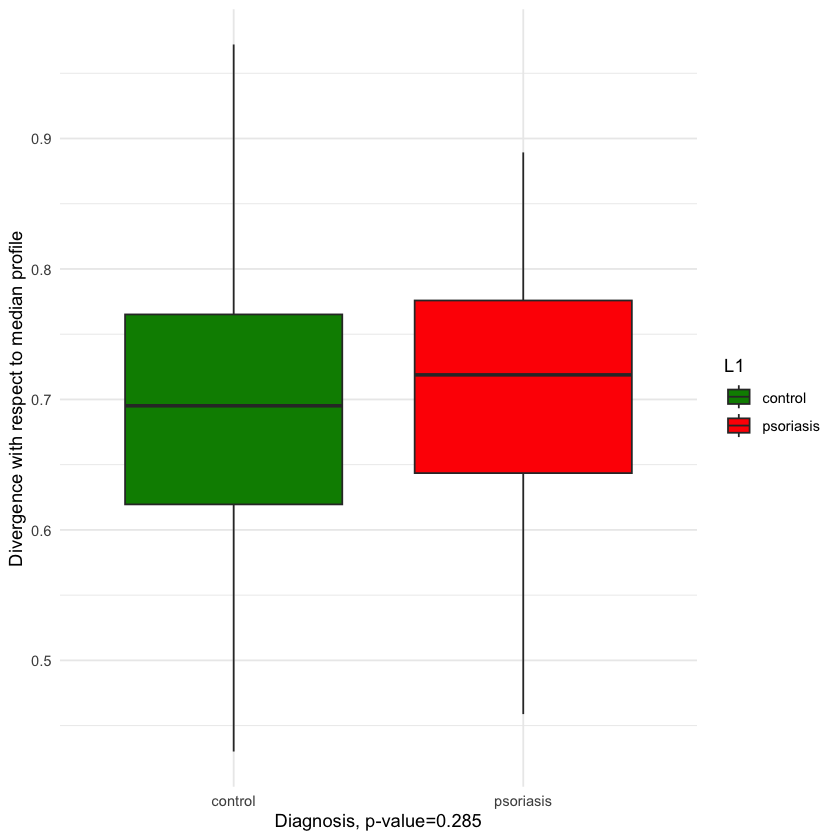

In [24]:
group.colors <- c(control = "green4", psoriasis = "red")
p<- ggplot(df, aes(x = L1, y = value, fill=L1)) + geom_boxplot()+ xlab('') + scale_fill_manual(values=group.colors)
p + theme_minimal() + labs(x="Diagnosis, p-value=0.285", y="Divergence with respect to median profile")
